In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Image Classification using Caffe

In [2]:
image = cv2.imread("../data/images/airplane.jpg")

if image is None:
    print("No image found")

In [3]:
prototxt_file = "../data/models/bvlc_googlenet.prototxt"
weights_file = "../data/models/bvlc_googlenet.caffemodel"
caffe_class_file = "../data/models/classification_classes_ILSVRC2012.txt"

In [4]:
net = cv2.dnn.readNetFromCaffe(prototxt_file,weights_file)

with open(caffe_class_file,'r') as f:
    classes = f.read().rstrip("\n").split("\n")

inHeight = 224
inWidth = 224
swap_rgb = False
mean = [104, 117, 123]
scale = 1.0

blob = cv2.dnn.blobFromImage(image,scale,(inWidth,inHeight),mean,swap_rgb,crop = False)

In [5]:
net.setInput(blob)

output = net.forward()
print(output.shape)
output = output.ravel()

class_idx = np.argmax(output)
class_name = classes[class_idx]
prob = output[class_idx]

(1, 1000)


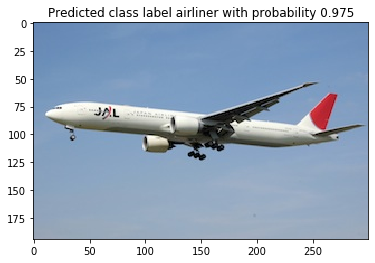

In [6]:
plt.imshow(image[:,:,::-1]);
plt.title("Predicted class label {} with probability {:.3f}".format(class_name,prob));

## Image Classification using Tensorflow

In [7]:
image = cv2.imread("../data/images/airplane.jpg")

if image is None:
    print("No image found")

In [9]:
weights_file = "../data/models/tensorflow_inception_graph.pb"
tensorflow_class_file = "../data/models/imagenet_comp_graph_label_strings.txt"

In [10]:
net = cv2.dnn.readNetFromTensorflow(weights_file)

with open(tensorflow_class_file,'r') as f:
    classes = f.read().rstrip("\n").split("\n")

inHeight = 224
inWidth = 224
swap_rgb = True
mean = [117, 117, 117]
scale = 1.0

blob = cv2.dnn.blobFromImage(image,scale,(inWidth,inHeight),mean,swap_rgb,crop = False)

In [11]:
net.setInput(blob)

output = net.forward()
print(output.shape)
output = output.ravel()

class_idx = np.argmax(output)
class_name = classes[class_idx]
prob = output[class_idx]

(1, 1008)


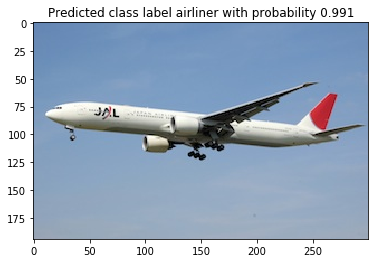

In [12]:
plt.imshow(image[:,:,::-1]);
plt.title("Predicted class label {} with probability {:.3f}".format(class_name,prob));